In [1]:
# Liuchong in NJU @ 2019-03
import pandas as pd
import numpy as np
import xarray as xr
import os, time, datetime
from datetime import datetime
import glob
import matplotlib.pyplot as plt
from matplotlib import cm as CM
from matplotlib.colors import LogNorm,PowerNorm,ListedColormap,LinearSegmentedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

C:\Users\xigrug\Anaconda3\Anaconda\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\xigrug\Anaconda3\Anaconda\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
def plotMap(filename,newcmap,name,varname,clim):
    cities=pd.read_table(filename,sep=',',na_values=[-9999])
    # Extract the data we're interested in
    lat = cities['lat_bin'].values
    lon = cities['lon_bin'].values
    ccn = cities[name].values
    ccn_max=np.nanmax(ccn)
    ccn_min=np.nanmin(ccn)
    fig = plt.figure(figsize=[15, 15])
    ax= fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
    #Zoom in
    ax.set_extent([105, 133, 15, 53])
    lon_formatter = LongitudeFormatter(number_format='.1f',
                                       degree_symbol='',
                                       dateline_direction_label=True)
    lat_formatter = LatitudeFormatter(number_format='.1f',
                                      degree_symbol='')
    ax.set_xticks([110, 120, 130],crs=ccrs.PlateCarree())
    ax.set_xticklabels([110, 120, 130],fontsize=20)  
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.set_yticks([20, 30, 40,50], crs=ccrs.PlateCarree())
    ax.set_yticklabels([20, 30, 40,50],fontsize=20)
    ax.yaxis.set_major_formatter(lat_formatter)
    #Add map features
    ax.add_feature(cfeature.LAND, facecolor='0.99') #Grayscale colors can be set using 0 (black) to 1 (white)
    ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), zorder=10, linestyle=':') # high resolution
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), zorder=10, linestyle=':') # mediate resolution
    ax.add_feature(cfeature.RIVERS) # low resolution
    #ax.stock_img()
    ax.gridlines(ylocs=np.arange(0,90,5),xlocs=np.arange(0,180,5),draw_labels=False,linestyle='--',alpha=0.7)
    #axes[i].xaxis.set_major_formatter(lon_formatter)
    #We can use additional features from Natural Earth (http://www.naturalearthdata.com/features/)
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m',facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
    fname = 'D:\data\map\CHN_adm1.shp'
    adm1_shapes = list(Reader(fname).geometries())
    ax.add_geometries(adm1_shapes, crs=ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.9,linewidths=0.8)
    #norm = mpl.colors.BoundaryNorm(bounds, newcmap.N)
    #norm = mpl.colors.LogNorm()
    #norm = mpl.colors.SymLogNorm(linthresh=0.03, linscale=0.1, vmin=50, vmax=ccn_max)
    ccn_sca=ax.scatter(lon,lat,#latlon=True,
          c=ccn,
          cmap=newcmap,norm=PowerNorm(gamma=0.7),alpha=0.8,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
    cax = fig.add_axes([0.81, 0.45, 0.02, 0.4])
    cbar=plt.colorbar(ccn_sca, cax, orientation='vertical',label=varname,extendfrac=1/15,extendrect=True)
    #plt.colorbar(label=r'CCN ($cm^{-3}$)')
    cbar.ax.tick_params(labelsize=25)
    cbar.set_label(varname,fontsize=25)
    ccn_sca.set_clim(clim[0],clim[1])
    return ccn_sca

C:\Users\xigrug\Anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


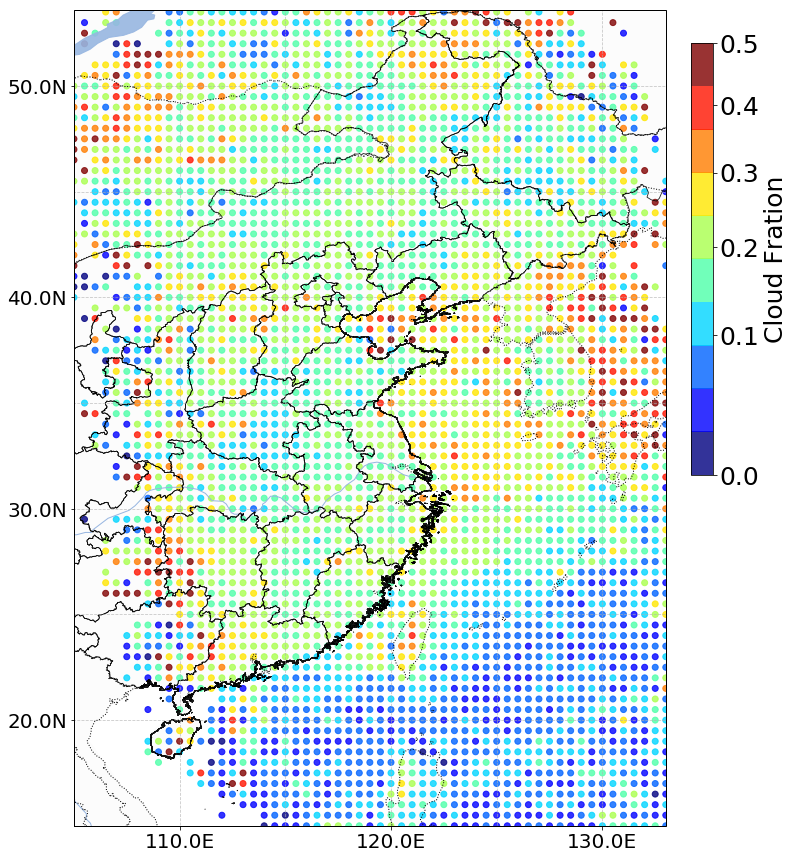

In [3]:
filename="1allsum-0.5-NaN-all_0-360_850hpa.csv"
cmap=CM.get_cmap('jet',10) 
varname="Cloud Fration"
name='Cloud_fra'
clim=[0,0.5]
ctt=plotMap(filename,cmap,name,varname,clim)
plt.savefig('cloudfa.png',bbox_inches='tight',dpi=600)